## Note: <br><br><font color='red'>1).</font> this notebook is to prepare COVID-19 data for AWS sagemaker analysis; <br><font color='red'>2).</font> also, it serves as preanalysis to find the best model

## 1. Pre-model Analysis: process and visualize data; get insights of features and target.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 999)

df = pd.read_csv('./data/version 6 - 19-5-20.csv', low_memory=False,)
df.head()

,age,age_band,background_diseases,background_diseases_binary,city,confirmed_date,country,date_onset_symptoms,deceased_date,infected_by,...,sex,smoking,symptoms,treatment,id,return_date_until_date_onset_symptoms,date_onset_symptoms_until_confirmed_date,confirmed_date_until_released_date,confirmed_date_until_deceased_date,severity_illness_infectious_person
0,NaN,NaN,NaN,NaN,NaN,2020-02-28,france,NaN,NaN,NaN,...,male,NaN,NaN,hospitalized,0,NaN,NaN,-25.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2020-02-28,france,NaN,NaN,NaN,...,male,NaN,NaN,hospitalized,1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,2020-02-28,france,NaN,NaN,NaN,...,female,NaN,NaN,hospitalized,2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,2020-03-03,france,NaN,NaN,NaN,...,male,NaN,NaN,hospitalized,3,NaN,NaN,3.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,2020-03-05,france,NaN,NaN,NaN,...,male,NaN,NaN,home isolation,4,NaN,NaN,NaN,NaN,NaN


In [2]:
df.columns

Index(['age', 'age_band', 'background_diseases', 'background_diseases_binary',
       'city', 'confirmed_date', 'country', 'date_onset_symptoms',
       'deceased_date', 'infected_by', 'infection_place', 'region',
       'released_date', 'return_date', 'severity_illness', 'sex', 'smoking',
       'symptoms', 'treatment', 'id', 'return_date_until_date_onset_symptoms',
       'date_onset_symptoms_until_confirmed_date',
       'confirmed_date_until_released_date',
       'confirmed_date_until_deceased_date',
       'severity_illness_infectious_person'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695045 entries, 0 to 695044
Data columns (total 25 columns):
age                                         214690 non-null float64
age_band                                    215072 non-null float64
background_diseases                         67881 non-null object
background_diseases_binary                  543106 non-null float64
city                                        357200 non-null object
confirmed_date                              689551 non-null object
country                                     694044 non-null object
date_onset_symptoms                         196285 non-null object
deceased_date                               8978 non-null object
infected_by                                 1667 non-null object
infection_place                             11544 non-null object
region                                      496212 non-null object
released_date                               6447 non-null object
return_date            

In [4]:
from scipy.stats import describe

stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
#print(stats)
#print(stats.transpose())
stats.transpose()

,count,mean,std,min,25%,50%,75%,max,var,skew,kurt
age,214690.0,42.620018,17.335928,0.0,30.0,41.0,54.0,120.0,3.005344e+02,2.560915e-01,0.036377
age_band,215072.0,38.162336,17.484730,0.0,30.0,40.0,50.0,120.0,3.057158e+02,2.871296e-01,-0.035397
background_diseases_binary,543106.0,0.125007,0.330727,0.0,0.0,0.0,0.0,1.0,1.093804e-01,2.267698e+00,3.142464
smoking,176456.0,0.093173,0.290676,0.0,0.0,0.0,0.0,1.0,8.449257e-02,2.799207e+00,5.835626
id,695045.0,347522.000000,200642.353261,0.0,173761.0,347522.0,521283.0,695044.0,4.025735e+10,1.651800e-15,-1.200000
return_date_until_date_onset_symptoms,1280.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000
date_onset_symptoms_until_confirmed_date,196168.0,3.976668,4.010828,-8.0,1.0,3.0,6.0,90.0,1.608674e+01,2.779863e+00,19.089732
confirmed_date_until_released_date,6443.0,832.160019,3775.432061,-25.0,10.0,15.0,25.0,18352.0,1.425389e+07,4.416424e+00,17.510410
confirmed_date_until_deceased_date,8930.0,337.943337,2445.722213,-30.0,1.0,4.0,9.0,18357.0,5.981557e+06,7.222086e+00,50.170183


In [5]:
df.describe(include = np.object)

,background_diseases,city,confirmed_date,country,date_onset_symptoms,deceased_date,infected_by,infection_place,region,released_date,return_date,severity_illness,sex,symptoms,treatment,severity_illness_infectious_person
count,67881,357200,689551,694044,196285,8978,1667,11544,496212,6447,2160,32758,220105,1631,195773,1069
unique,291,4513,140,139,140,106,1002,1535,955,114,39,5,2,264,3,5
top,"obesity,",Moscow,1970-01-01,mexico,2020-05-01,2020-05-11,4668,contact with patient,Lombardia,2020-05-05,1970-01-01,good,male,fever,clinic,cured
freq,15621,18000,471310,179245,6613,282,51,994,58060,291,1902,13663,110997,405,132042,577


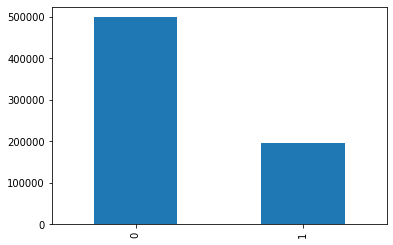

In [6]:
symptoms_onset_date_fl = df.date_onset_symptoms.map(lambda x: 1 if (type(x) == str)  else 0) 

symptoms_onset_date_fl.value_counts().plot.bar()

In [7]:
df.severity_illness.value_counts() 

good            13663
deceased         7772
cured            7185
critical         4050
asymptomatic       88
Name: severity_illness, dtype: int64

In [8]:
df.country.value_counts()

mexico                              179245
italy                               158004
united states                       118002
china                                42345
russia                               32759
united kingdom                       17814
colombia                             16672
spain                                16158
canada                               14690
france                               12178
ecuador                              10947
south korea                           7084
iran                                  7026
germany                               6517
egypt                                 4635
south africa                          4542
austria                               4240
netherlands                           4150
brazil                                4121
belgium                               3746
singapore                             3570
korea                                 3491
chile                                 2739
philippines

In [9]:
len(df[df["country"].notnull()].country.unique() )

139

In [10]:
len(df.country.value_counts() )

139

In [11]:
#df.country.value_counts()[0:5].plot.bar()

In [12]:
dfoi = df[df['date_onset_symptoms'].notnull()]

mexico           179245
italy            158004
united states    118002
china             42345
russia            32759
Name: country, dtype: int64 

########################

mexico      179239
colombia     14297
china          940
korea          491
japan          486
Name: country, dtype: int64



Barcharts of Patients Counts by Country


Text(0.5, 1.0, 'dfoi - has Symptoms Onset Date')

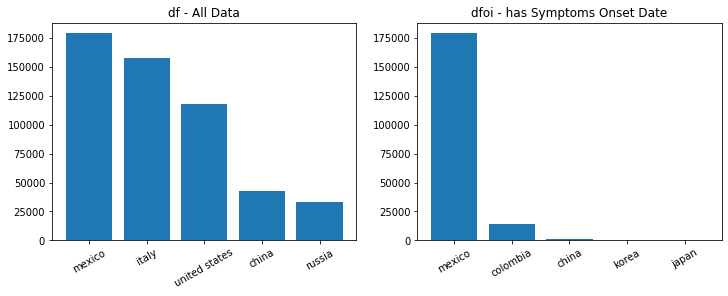

In [13]:
print(df.country.value_counts()[0:5], \
      '\n\n########################\n\n' \
      + str(dfoi.country.value_counts()[0:5]))

print('\n\n\nBarcharts of Patients Counts by Country')
fig = plt.figure(figsize=(12,4))
#fig = plt.figure(2,1)
plt.subplot(1,2,1)
plt.bar(height = df.country.value_counts()[0:5], x = df.country.value_counts()[0:5].index)
plt.xticks(rotation=30)
plt.title('df - All Data')

plt.subplot(1,2, 2)
plt.bar(height = dfoi.country.value_counts()[0:5], x = dfoi.country.value_counts()[0:5].index)
plt.xticks(rotation=30)
plt.title('dfoi - has Symptoms Onset Date')
#dfoi.symptoms.value_counts()[0:10].plot.bar(logy =True)

In [14]:
len(df.symptoms.value_counts() ), len(dfoi.symptoms.value_counts() )

(264, 185)

In [15]:
print( df.symptoms.value_counts()[:10], \
      '\n\n###############################\n\n' \
      + str(dfoi.symptoms.value_counts()[:10] ))

fever                                 405
cough, fever                          213
cough                                  70
pneumonia                              64
no_symptom                             46
cough, fever, myalgia                  38
breathing difficulty, cough, fever     36
breathing difficulty, pneumonia        27
breathing difficulty                   23
fever, sore throat                     22
Name: symptoms, dtype: int64 

###############################

fever                                 356
cough, fever                          174
cough                                  54
pneumonia                              44
cough, fever, myalgia                  22
fever, sore throat                     19
cough, fever, sputum                   19
breathing difficulty, cough, fever     19
breathing difficulty                   17
fatigue, fever                         13
Name: symptoms, dtype: int64




Barcharts of Patients Counts by Symptoms


Text(0.5, 1.0, 'dfoi - has Symptoms Onset Date')

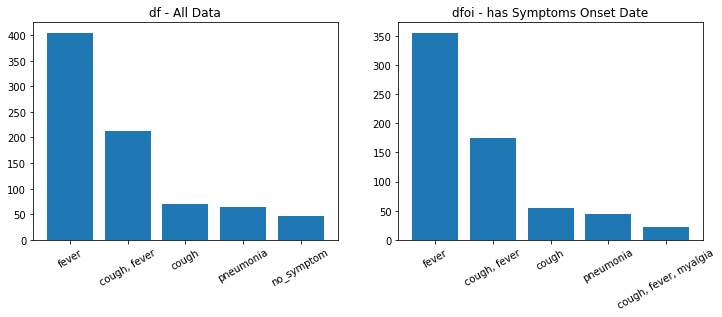

In [16]:
print('\n\nBarcharts of Patients Counts by Symptoms')
fig = plt.figure(figsize=(12,4))
#fig = plt.figure(2,1)
plt.subplot(1,2,1)
plt.bar(height = df.symptoms.value_counts()[0:5], x = df.symptoms.value_counts()[0:5].index)
plt.xticks(rotation=30)
plt.title('df - All Data')

plt.subplot(1,2, 2)
plt.bar(height = dfoi.symptoms.value_counts()[0:5], x = dfoi.symptoms.value_counts()[0:5].index)
plt.xticks(rotation=30)
plt.title('dfoi - has Symptoms Onset Date')
#dfoi.symptoms.value_counts()[0:10].plot.bar(logy =True)


Death = 1, Others = 0 

All Dataset
0    686067
1      8978
Name: death, dtype: int64

Selected: Patient has Symptoms Onset Date
0    187607
1      8678
Name: death, dtype: int64

Mexico
0    171248
1      7997
Name: death, dtype: int64

Mexico + Colombia
0    187313
1      8604
Name: death, dtype: int64



Barcharts of Patients Counts by Healthcare Outcome


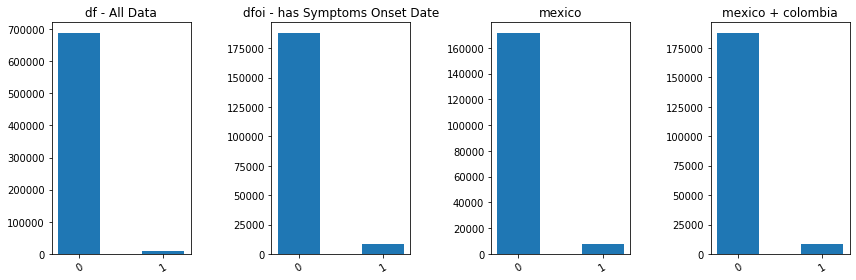

In [17]:
data1 = {'death': np.where(df['deceased_date'].isnull(), 0, 1)}
#pd.DataFrame(data1).death.value_counts().plot.bar(logy=True)

data2 = {'death': np.where(dfoi['deceased_date'].isnull(), 0, 1)}
#pd.DataFrame(data2).death.value_counts().plot.bar(logy=True)

mex = pd.DataFrame()
mex['death'] = df[(df['country']=='mexico')]['deceased_date'].map(lambda x: 1 if (type(x) == str)  else 0) 

mc = pd.DataFrame()
mc['death'] = df[( (df['country'] == 'mexico') | (df['country'] == 'colombia')  )]\
              ['deceased_date'].map(lambda x: 1 if (type(x) == str)  else 0) 
#print('\nDeath = 1, Others = 0 \n' + str(mex.death.value_counts() ))

print('\nDeath = 1, Others = 0 \n\nAll Dataset\n'\
      + str(pd.DataFrame(data1).death.value_counts())\
      + '\n\nSelected: Patient has Symptoms Onset Date\n'+ str(pd.DataFrame(data2).death.value_counts() )\
      + '\n\nMexico\n' + str(mex.death.value_counts() )\
      + '\n\nMexico + Colombia\n' + str(mc.death.value_counts() ))


print('\n\n\nBarcharts of Patients Counts by Healthcare Outcome')
fig = plt.subplots(figsize=(12,4), sharey = True)
plt.subplot(1,4,1)
plt.bar(height = pd.DataFrame(data1).death.value_counts(), x = ('0', '1'), width=0.5,)
plt.xticks(rotation=30)
plt.title('df - All Data')
#plt.yscale('log')

plt.subplot(1,4, 2)
plt.bar(height = pd.DataFrame(data2).death.value_counts(), x = ('0', '1'),width=0.5,)
plt.xticks(rotation=30)
plt.title('dfoi - has Symptoms Onset Date')
#plt.yscale('log')

plt.subplot(1,4, 3)
plt.bar(height = mex.death.value_counts(), x = ('0', '1'),width=0.5,)
plt.xticks(rotation=30)
plt.title('mexico')
#plt.yscale('log')

plt.subplot(1,4, 4)
plt.bar(height = mc.death.value_counts(), x = ('0', '1'),width=0.5,)
plt.xticks(rotation=30)
plt.title('mexico + colombia')
#plt.yscale('log')

plt.tight_layout()

In [18]:
df2 = df[( (df['country']=='mexico') | (df['country']=='colombus') ) & df['date_onset_symptoms'].notnull()]
len(df2)

179239

## 2. Problem Definition: translate the business needs into machine learning problems; design metrics to measure model performance.

###  1). We will classify the data into two parts: survival or death of patient health outcome. Create a label "Death", and transform other data into features, like patient's age, gender, country, region, symptoms onset days, background disease.

### 2). We will apply classification metrics like accuracy, recall, precision, ROC AUC, threshold to evaluate model performance.

## 3. Feature Engineering: create features which might improve model performance.


In [19]:
# from sklearn.model_selection import train_test_split
# X, X_test = train_test_split(df2, 
#                                    test_size=0.2, 
#                                    random_state=2019)

# X = X.reset_index(drop=True)
# X_test = X_test.reset_index(drop=True)

# len(X), len(X_test)

In [20]:
class FeatureTransformer(object):
    
    def fit(self, X, y=None):
        df = pd.DataFrame()
        #df['background_diseases_binary'] = X['background_diseases_binary']
        df['bg_disease_cnt'] = X.background_diseases.map(lambda x: len(x.split(',')) if type(x) == str  else 0) 
        df['symptoms_cnt'] = X.symptoms.map(lambda x: len(x.split(',')) if (type(x) == str and x != 'no_symptom')  else 0)
        df['days_onset'] =  (pd.to_datetime(np.where(X['deceased_date'].isnull(), ('2020-05-19'), X['deceased_date']))\
                             - pd.to_datetime(X.date_onset_symptoms) ).dt.days + 1
        df['days_confirm'] =  (pd.to_datetime(np.where(X['deceased_date'].isnull(), ('2020-05-19'), X['deceased_date']))\
                               - pd.to_datetime(X.confirmed_date) ).dt.days + 1
        df['days_confirm'] = df['days_confirm'].fillna(df['days_confirm'].mean()) 
        #df['death'] = np.where(X['deceased_date'].isnull(), 0, 1)
        df['gender'] = X.sex.map(lambda x: 2 if x == 'male' else (1 if x == 'female' else 0) )
        df['age'] = X.age.fillna(X['age'].mean())
        df['smoke'] = np.where(X['smoking'].isnull(), 0, 1)
        df['treat'] = X.treatment.map(lambda x: 3 if x == 'hospitalized' else (2 if x == 'hospital' or x == 'clinical' else \
                                        (1 if x == 'home isolation' else 0 ) ) )
        
        self.means = df.mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        #df['background_diseases_binary'] = X['background_diseases_binary']
        df['bg_disease_cnt'] = X.background_diseases.map(lambda x: len(x.split(',')) if type(x) == str  else 0) 
        df['symptoms_cnt'] = X.symptoms.map(lambda x: len(x.split(',')) if (type(x) == str and x != 'no_symptom')  else 0)
        df['days_onset'] =  (pd.to_datetime(np.where(X['deceased_date'].isnull(), ('2020-05-19'), X['deceased_date']))\
                             - pd.to_datetime(X.date_onset_symptoms) ).dt.days + 1
        df['days_confirm'] =  (pd.to_datetime(np.where(X['deceased_date'].isnull(), ('2020-05-19'), X['deceased_date']))\
                               - pd.to_datetime(X.confirmed_date) ).dt.days + 1
        df['days_confirm'] = df['days_confirm'].fillna(df['days_confirm'].mean()) 
        #df['death'] = np.where(X['deceased_date'].isnull(), 0, 1)
        df['gender'] = X.sex.map(lambda x: 2 if x == 'male' else (1 if x == 'female' else 0) )
        df['age'] = X.age.fillna(X['age'].mean())
        df['smoke'] = np.where(X['smoking'].isnull(), 0, 1)
        df['treat'] = X.treatment.map(lambda x: 3 if x == 'hospitalized' else (2 if x == 'hospital' or x == 'clinical' else \
                                        (1 if x == 'home isolation' else 0 ) ) )
        
        #return df.fillna(self.mean)                              # equivalent

        return df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)


In [21]:
def death(x):
    if type(x) != str:     # NaN is not string
        x = 0
    else:
        x = 1
    return x

features = list(df2.columns)
#features = ['background_diseases', 'symptoms', 'date_onset_symptoms', 'confirmed_date', 'sex', 'age', 'smoking', 'treatment']

# Actual engineered features:
#features = ['bg_disease_cnt', 'symptoms_cnt', 'days_onset',     'days_confirm',     'gender', 'age',  'smoke',   'treat']

target = 'deceased_date'
#features.remove(target)

X = df2[features]
y = df2[target].map(death)
X.head()

,age,age_band,background_diseases,background_diseases_binary,city,confirmed_date,country,date_onset_symptoms,deceased_date,infected_by,...,sex,smoking,symptoms,treatment,id,return_date_until_date_onset_symptoms,date_onset_symptoms_until_confirmed_date,confirmed_date_until_released_date,confirmed_date_until_deceased_date,severity_illness_infectious_person
41786,51.0,50.0,NaN,NaN,NaN,2020-05-11,mexico,2020-05-09,NaN,NaN,...,male,0.0,NaN,hospitalized,41786,NaN,2.0,NaN,NaN,NaN
41787,46.0,40.0,NaN,NaN,NaN,2020-05-12,mexico,2020-05-07,NaN,NaN,...,male,0.0,NaN,clinic,41787,NaN,5.0,NaN,NaN,NaN
41788,45.0,40.0,"obesity,",1.0,NaN,2020-05-14,mexico,2020-05-11,NaN,NaN,...,male,0.0,NaN,clinic,41788,NaN,3.0,NaN,NaN,NaN
41789,27.0,20.0,"asthma,",1.0,NaN,2020-03-28,mexico,2020-03-26,NaN,NaN,...,female,0.0,NaN,hospitalized,41789,NaN,2.0,NaN,NaN,NaN
41790,37.0,30.0,NaN,NaN,NaN,2020-03-30,mexico,2020-03-24,NaN,NaN,...,female,0.0,NaN,clinic,41790,NaN,6.0,NaN,NaN,NaN


In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y, 
                                                      test_size=0.2, 
                                                      random_state=2019)

In [23]:
len(X_train), len(X_valid), len(y_train), len(y_valid)

(143391, 35848, 143391, 35848)

# 4. Modeling: Model selection, feature elimination, validation, hyperparameter tuning.


In [24]:
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

steps = [('ft', FeatureTransformer()),
         ('smt', SMOTE (random_state=42)),
         ('rescale', MinMaxScaler()), 
         ('logr', LogisticRegression(random_state = 2019)), ]
model = Pipeline(steps)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

Pipeline(steps=[('ft',
                 <__main__.FeatureTransformer object at 0x0000021A3C64C588>),
                ('smt', SMOTE(random_state=42)), ('rescale', MinMaxScaler()),
                ('logr', LogisticRegression(random_state=2019))])

In [25]:
X_train_res = model[0].fit_transform(X_train)
#X_test_res = model[0].fit_transform(X_test)
X_valid_res = model[0].fit_transform(X_valid)

In [26]:
X_train_res.head()

,bg_disease_cnt,symptoms_cnt,days_onset,days_confirm,gender,age,smoke,treat
47608,2,0,10,7.0,1,56.0,1,3
117299,2,0,41,34.0,2,24.0,1,0
130814,2,0,5,5.0,1,31.0,1,0
161290,0,0,15,13.0,2,27.0,1,0
190052,0,0,52,47.0,2,41.0,1,0


In [27]:
sum(y_train), len(y_train), len(y_train)/sum(y_train)  # the ratio will be used in xgboost for hyperparameter tuning

(6429, 143391, 22.303779748016797)

In [28]:
covid_train = pd.DataFrame(y_train).join(X_train_res)
covid_train
covid_train.to_csv('./data/covid_train.csv',header=False, index = False) #covid_train and covid_test will be used for sagemaker input data in AWS

In [29]:
covid_test = pd.DataFrame(y_valid).join(X_valid_res)
covid_test
covid_test.to_csv('./data/covid_test.csv',header=False, index = False)  #covid_train and covid_test will be used for sagemaker input data in AWS

### Model 1 = Logistic regression

In [30]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

steps = [('ft', FeatureTransformer()),
         ('smt', SMOTE (random_state=42)),
         ('rescale', MinMaxScaler()), 
         ('logr', LogisticRegression(C = 1000, random_state = 0, solver = 'newton-cg', class_weight = 'balanced')), ]
model = Pipeline(steps)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(steps=[('ft',
                 <__main__.FeatureTransformer object at 0x0000021A56C0AE48>),
                ('smt', SMOTE(random_state=42)), ('rescale', MinMaxScaler()),
                ('logr',
                 LogisticRegression(C=1000, class_weight='balanced',
                                    random_state=0, solver='newton-cg'))])

In [31]:
y_train_pred = model.predict(X_train)

y_valid_pred = model.predict(X_valid)

y_train_pred.shape, y_valid_pred.shape, y_train_pred, y_valid_pred

((143391,),
 (35848,),
 array([1, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [32]:
from sklearn.metrics import accuracy_score

print ("y_train Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_train, y_train_pred) )
print ("y_test Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_valid, y_valid_pred) )

y_train Accuracy Rate, which is calculated by accuracy_score() is: 0.887
y_test Accuracy Rate, which is calculated by accuracy_score() is: 0.888


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred,))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    136962
           1       0.27      0.91      0.42      6429

    accuracy                           0.89    143391
   macro avg       0.63      0.90      0.68    143391
weighted avg       0.96      0.89      0.91    143391



In [34]:
print(classification_report(y_valid, y_valid_pred,))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     34280
           1       0.27      0.92      0.42      1568

    accuracy                           0.89     35848
   macro avg       0.63      0.90      0.68     35848
weighted avg       0.96      0.89      0.92     35848



In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[121271,  15691],
       [   579,   5850]], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_valid_pred)
cm

array([[30405,  3875],
       [  132,  1436]], dtype=int64)

In [37]:
# ROC AUC

from sklearn.metrics import roc_auc_score
print('train roc_auc_scores:', roc_auc_score(y_train, y_train_pred, average='macro', ) )
print('valid roc_auc_scores: ', roc_auc_score(y_valid, y_valid_pred, average='macro', ) )

train roc_auc_scores: 0.8976873568066263
valid roc_auc_scores:  0.9013883266258662


### Model 2 = Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

steps = [('ft', FeatureTransformer()),
         ('smt', SMOTE (random_state=42)),
         ('rescale', MinMaxScaler()),  
         ('rf', RandomForestClassifier(n_estimators = 1000, max_features = 'sqrt', criterion = 'entropy', random_state = 0)), ]
model = Pipeline(steps)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(steps=[('ft',
                 <__main__.FeatureTransformer object at 0x0000021A5688A608>),
                ('smt', SMOTE(random_state=42)), ('rescale', MinMaxScaler()),
                ('rf',
                 RandomForestClassifier(criterion='entropy',
                                        max_features='sqrt', n_estimators=1000,
                                        random_state=0))])

In [39]:
y_train_pred = model.predict(X_train)

y_valid_pred = model.predict(X_valid)

# y_train_pred.shape, y_valid_pred.shape, y_train_pred, y_valid_pred

from sklearn.metrics import accuracy_score

print ("y_train Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_train, y_train_pred) )
print ("y_test Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_valid, y_valid_pred) )

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred,))

print(classification_report(y_valid, y_valid_pred,))

y_train Accuracy Rate, which is calculated by accuracy_score() is: 0.994
y_test Accuracy Rate, which is calculated by accuracy_score() is: 0.959
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136962
           1       0.94      0.92      0.93      6429

    accuracy                           0.99    143391
   macro avg       0.97      0.96      0.96    143391
weighted avg       0.99      0.99      0.99    143391

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     34280
           1       0.53      0.46      0.49      1568

    accuracy                           0.96     35848
   macro avg       0.75      0.72      0.74     35848
weighted avg       0.96      0.96      0.96     35848



In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[136572,    390],
       [   513,   5916]], dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_valid_pred)
cm

array([[33654,   626],
       [  851,   717]], dtype=int64)

In [42]:
# ROC AUC

from sklearn.metrics import roc_auc_score
print('train roc_auc_scores:', roc_auc_score(y_train, y_train_pred, average='macro', ) )
print('valid roc_auc_scores: ', roc_auc_score(y_valid, y_valid_pred, average='macro', ) )

train roc_auc_scores: 0.958678907248972
valid roc_auc_scores:  0.719504515633558


### Model 3 = SVM

In [43]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

steps = [('ft', FeatureTransformer()),
         ('smt', SMOTE (random_state=42)),
         ('rescale', MinMaxScaler()),  
         ('svc', svm.SVC(random_state = 0)), ]
model = Pipeline(steps)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(steps=[('ft',
                 <__main__.FeatureTransformer object at 0x0000021A004917C8>),
                ('smt', SMOTE(random_state=42)), ('rescale', MinMaxScaler()),
                ('svc', SVC(random_state=0))])

In [44]:
y_train_pred = model.predict(X_train)

y_valid_pred = model.predict(X_valid)

# y_train_pred.shape, y_valid_pred.shape, y_train_pred, y_valid_pred

from sklearn.metrics import accuracy_score

print ("y_train Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_train, y_train_pred) )
print ("y_test Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_valid, y_valid_pred) )

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred,))

print(classification_report(y_valid, y_valid_pred,))

y_train Accuracy Rate, which is calculated by accuracy_score() is: 0.813
y_test Accuracy Rate, which is calculated by accuracy_score() is: 0.814
              precision    recall  f1-score   support

           0       0.99      0.81      0.89    136962
           1       0.18      0.88      0.30      6429

    accuracy                           0.81    143391
   macro avg       0.59      0.85      0.59    143391
weighted avg       0.96      0.81      0.87    143391

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     34280
           1       0.18      0.88      0.29      1568

    accuracy                           0.81     35848
   macro avg       0.58      0.84      0.59     35848
weighted avg       0.96      0.81      0.87     35848



In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[110962,  26000],
       [   767,   5662]], dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_valid_pred)
cm

array([[27817,  6463],
       [  194,  1374]], dtype=int64)

In [47]:
# ROC AUC

from sklearn.metrics import roc_auc_score
print('train roc_auc_scores:', roc_auc_score(y_train, y_train_pred, average='macro', ) )
print('valid roc_auc_scores: ', roc_auc_score(y_valid, y_valid_pred, average='macro', ) )

train roc_auc_scores: 0.8454315829692582
valid roc_auc_scores:  0.8438699604696022


### Model 4 = KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

steps = [('ft', FeatureTransformer()),
         ('smt', SMOTE (random_state=42)),
         ('rescale', MinMaxScaler()),  
         ('knn', KNeighborsClassifier(n_neighbors=3)), ]
model = Pipeline(steps)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(steps=[('ft',
                 <__main__.FeatureTransformer object at 0x0000021A585E7248>),
                ('smt', SMOTE(random_state=42)), ('rescale', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [49]:
y_train_pred = model.predict(X_train)

y_valid_pred = model.predict(X_valid)

# y_train_pred.shape, y_valid_pred.shape, y_train_pred, y_valid_pred

from sklearn.metrics import accuracy_score

print ("y_train Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_train, y_train_pred) )
print ("y_test Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_valid, y_valid_pred) )

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred,))

print(classification_report(y_valid, y_valid_pred,))

y_train Accuracy Rate, which is calculated by accuracy_score() is: 0.974
y_test Accuracy Rate, which is calculated by accuracy_score() is: 0.953
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    136962
           1       0.72      0.69      0.71      6429

    accuracy                           0.97    143391
   macro avg       0.85      0.84      0.85    143391
weighted avg       0.97      0.97      0.97    143391

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     34280
           1       0.46      0.42      0.44      1568

    accuracy                           0.95     35848
   macro avg       0.72      0.70      0.71     35848
weighted avg       0.95      0.95      0.95     35848



In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[135252,   1710],
       [  1992,   4437]], dtype=int64)

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_valid_pred)
cm

array([[33505,   775],
       [  903,   665]], dtype=int64)

In [52]:
# ROC AUC

from sklearn.metrics import roc_auc_score
print('train roc_auc_scores:', roc_auc_score(y_train, y_train_pred, average='macro', ) )
print('valid roc_auc_scores: ', roc_auc_score(y_valid, y_valid_pred, average='macro', ) )

train roc_auc_scores: 0.8388343874284494
valid roc_auc_scores:  0.7007496041006834


### Model 5 = XGBOOST

In [53]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

steps = [('ft', FeatureTransformer()),
         ('smt', SMOTE (random_state=42)),
         ('rescale', MinMaxScaler()),  
         ('xgb', XGBClassifier(scale_pos_weight=24,random_state = 0, num_round = 10, objective = 'binary:logistic', 
                               num_classes = 2, eval_metric = 'auc')), ]
model = Pipeline(steps)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(steps=[('ft',
                 <__main__.FeatureTransformer object at 0x0000021A3C64CCC8>),
                ('smt', SMOTE(random_state=42)), ('rescale', MinMaxScaler()),
                ('xgb',
                 XGBClassifier(eval_metric='auc', num_classes=2, num_round=10,
                               scale_pos_weight=24))])

In [54]:
y_train_pred = model.predict(X_train)

y_valid_pred = model.predict(X_valid)

# y_train_pred.shape, y_valid_pred.shape, y_train_pred, y_valid_pred

from sklearn.metrics import accuracy_score

print ("y_train Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_train, y_train_pred) )
print ("y_test Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_valid, y_valid_pred) )

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred,))

print(classification_report(y_valid, y_valid_pred,))

y_train Accuracy Rate, which is calculated by accuracy_score() is: 0.759
y_test Accuracy Rate, which is calculated by accuracy_score() is: 0.760
              precision    recall  f1-score   support

           0       1.00      0.75      0.86    136962
           1       0.15      0.98      0.27      6429

    accuracy                           0.76    143391
   macro avg       0.58      0.87      0.56    143391
weighted avg       0.96      0.76      0.83    143391

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     34280
           1       0.15      0.98      0.26      1568

    accuracy                           0.76     35848
   macro avg       0.58      0.87      0.56     35848
weighted avg       0.96      0.76      0.83     35848



In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[102528,  34434],
       [   116,   6313]], dtype=int64)

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_valid_pred)
cm

array([[25708,  8572],
       [   28,  1540]], dtype=int64)

In [57]:
# ROC AUC

from sklearn.metrics import roc_auc_score
print('train roc_auc_scores:', roc_auc_score(y_train, y_train_pred, average='macro', ) )
print('valid roc_auc_scores: ', roc_auc_score(y_valid, y_valid_pred, average='macro', ) )

train roc_auc_scores: 0.8652719789037471
valid roc_auc_scores:  0.8660422570428405


### Model 6 = xgboost without SMOTE/MINMAX scaler

In [58]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

steps = [('ft', FeatureTransformer()),
         ('xgb', XGBClassifier(scale_pos_weight=24,random_state = 2019, num_round = 10, objective = 'binary:logistic', 
                               num_classes = 2, eval_metric = 'auc')), ]
model = Pipeline(steps)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

y_valid_pred = model.predict(X_valid)

# y_train_pred.shape, y_valid_pred.shape, y_train_pred, y_valid_pred

from sklearn.metrics import accuracy_score

print ("y_train Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_train, y_train_pred) )
print ("y_test Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_valid, y_valid_pred) )

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred,))

print(classification_report(y_valid, y_valid_pred,))

y_train Accuracy Rate, which is calculated by accuracy_score() is: 0.879
y_test Accuracy Rate, which is calculated by accuracy_score() is: 0.882
              precision    recall  f1-score   support

           0       1.00      0.88      0.93    136962
           1       0.26      0.93      0.41      6429

    accuracy                           0.88    143391
   macro avg       0.63      0.91      0.67    143391
weighted avg       0.96      0.88      0.91    143391

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     34280
           1       0.26      0.94      0.41      1568

    accuracy                           0.88     35848
   macro avg       0.63      0.91      0.67     35848
weighted avg       0.96      0.88      0.91     35848



In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[120035,  16927],
       [   421,   6008]], dtype=int64)

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_valid_pred)
cm

array([[30131,  4149],
       [   97,  1471]], dtype=int64)

In [61]:
# ROC AUC

from sklearn.metrics import roc_auc_score
print('train roc_auc_scores:', roc_auc_score(y_train, y_train_pred, average='macro', ) )
print('valid roc_auc_scores: ', roc_auc_score(y_valid, y_valid_pred, average='macro', ) )

train roc_auc_scores: 0.9054632260265071
valid roc_auc_scores:  0.9085525414950111


## For summary of above model analysis and results from Sagemaker, please see Readme.MD